# The Sparks Foundation Internship (APR 2024) - Data Science and Business Analytics
Author: Roshni Sanjay Jadhav

Problem Statement: Supervised Machine Learning : Linear Regression Task\
Predict the percentage of an student based on the number of hours.

Question: What will be the predicted score if student studies for 9.25 hrs/day ?

Importing libraries

In [2]:
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt  
%matplotlib inline

Importing and reading the data

In [3]:
url = "http://bit.ly/w-data"
stu_data = pd.read_csv(url)
print("Data imported successfully")

stu_data.head(10)

Data imported successfully


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


EDA

In [4]:
stu_data.shape

(25, 2)

The data has 25 rows and 2 columns

In [5]:
stu_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [6]:
stu_data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


Based on the provided summary statistics for the 'Hours' and 'Scores' variables:

1.Study Hours Distribution: The distribution of study hours indicates that most students studied for fewer hours, with the majority studying for 4.8 hours or less.
2.Score Distribution: The distribution of scores shows variability, with scores ranging from 17 to 95. However, 50% of the students scored below 47, indicating a wide range of performance.
3.Relationship Between Study Hours and Scores: There appears to be a positive correlation between study hours and scores, as students who studied more tended to achieve higher scores. This is supported by the fact that the average score increases with an increase in study hours.
4.Variability in Scores: The high standard deviation in scores suggests variability in student performance, indicating that factors other than study hours may also influence scores, such as individual abilities, study techniques, and external factors.

In [22]:
stu_data.isnull().sum()          #To check for missing values

Hours     0
Scores    0
dtype: int64

There are no missing values present in the data

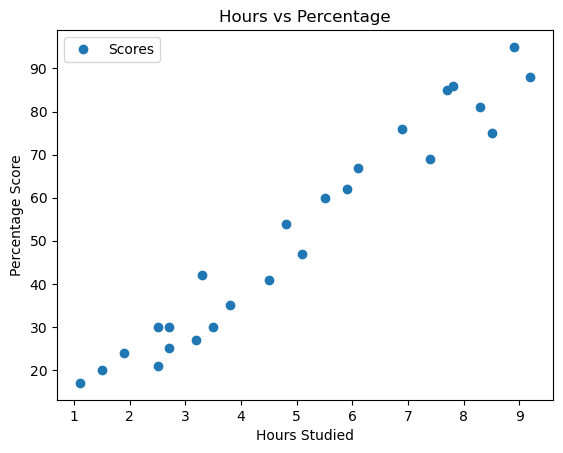

In [10]:
stu_data.plot(x='Hours', y='Scores', style='o')  
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()

From the graph above, we can clearly see that there is a positive linear relation between the number of hours studied and percentage of score.

In [12]:
X = stu_data.iloc[:, :-1].values  
y = stu_data.iloc[:, 1].values 

Splitting the data

In [13]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                            test_size=0.2, random_state=0) 

Fitting the data

In [14]:
from sklearn.linear_model import LinearRegression  
regressor = LinearRegression()  
regressor.fit(X_train, y_train) 

print("Fitting the model is done.")

Fitting the model is done.


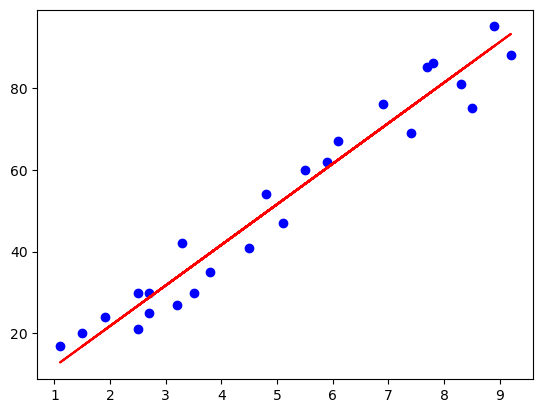

In [19]:
#Plotting the regression line
line = regressor.coef_*X+regressor.intercept_

#Plotting for the test data
plt.scatter(X, y,color='blue')
plt.plot(X, line,color='red');
plt.show()

In [16]:
print(X_test) # Testing data - In Hours
y_pred = regressor.predict(X_test) # Predicting the scores

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [17]:
# Comparing Actual vs Predicted
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df 

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


To find the answer of a given question 

In [20]:
hours = np.array(9.25).reshape(-1, 1)

#Predict using the reshaped data
own_pred = regressor.predict(hours)
print("No of Hours = {}".format(hours[0][0]))  # Accessing the value from the reshaped array
print("Predicted Score = {}".format(own_pred[0]))


No of Hours = 9.25
Predicted Score = 93.69173248737538


What will be the predicted score if student studies for 9.25 hrs/day ?\
So, If student studies for 9.25 hrs/day he/she will get a predicted score of 93.69%.

Evaluating the model

In [21]:
from sklearn import metrics  
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_absolute_error(y_test, y_pred)))


Mean Absolute Error: 4.183859899002975
Mean Squared Error: 21.5987693072174
Root Mean Squared Error: 2.0454485813637495


The model appears to have decent predictive performance, with relatively low errors compared to the scale of the target variable.